# TUGAS BESAR IF2220 PROBABILITAS DAN STATISTIKA 
Gede Prasidha Bhawarnawa - 13520004
Aditya Prawira Nugroho - 13520049

In [2]:
# INFORMASI UMUM TUGAS DAN SPESIFIKASI
# Pemanggilan library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as st

data = pd.read_csv('water_potability.csv', index_col=0)

In [ ]:
# NOMOR 1
# Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data yang bersifat
# numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum,
# maksimum, kuartil, IQR, skewness dan kurtosis. Boleh juga ditambahkan deskripsi lain.

# Catatan : Jika menggunakan Visual Studio Code untuk membuka file ini, maka mungkin dibutuhkan sebuah text editor terpisah untuk menampilkan semua hasil perhitungan
print("Jawaban Nomor 1:")
for columnName in data.columns[:-1]:
    print(columnName.upper(), end="\n")

    print("Berikut adalah data deskripsi statistika dari kolom {}:".format(columnName))
    print("Mean: {mean}".format(mean=data[columnName].mean()))
    print("Median: {median}".format(median=data[columnName].median()))
    # Cek dulu apakah terdapat data yang muncul lebih dari sekali dalam dataset, bila tidak maka modus tidak ada
    if (len(data[columnName].value_counts()) == len(data[columnName])):
        print("Dari {allValues} pada tabel {idxColumn}, terdapat {uniqueValues} nilai unik".format(allValues=len(data[columnName]), idxColumn=columnName, uniqueValues=len(data[columnName].value_counts())))
        print("Karena jumlahnya sama, maka tidak ada modus")
    else:
        print("Terdapat sejumlah data yang menjadi modus pada kolom data {idxColumn}".format(idxColumn=columnName))
        print("Jumlah modusnya adalah {qtyMode} data dengan jumlah occurence sebanyak {occurence} per data".format(qtyMode=len(data[columnName].mode()), occurence=(data[columnName] == data[columnName].mode()[0]).sum()))
        print("Modusnya adalah ", end="")
        for idx in data[columnName].mode():
            print(idx, end=", ")
    print("Standar Deviasi: {std}".format(std=data[columnName].std()))
    print("Variansi: {var}".format(var=data[columnName].var()))
    print("Range: {range}".format(range=data[columnName].max() - data[columnName].min()))
    print("Nilai Minimum: {min}".format(min=data[columnName].min()))
    print("Nilai Maksimum: {max}".format(max=data[columnName].max()))
    print("Kuartil 1,2,3: {q1}, {q2}, {q3}".format(q1=data[columnName].quantile(0.25), q2=data[columnName].quantile(0.5), q3=data[columnName].quantile(0.75)))
    print("IQR: {iqr}".format(iqr=data[columnName].quantile(0.75) - data[columnName].quantile(0.25)))
    print("Skewness: {skew}".format(skew=data[columnName].skew()))
    print("Kurtosis: {kurt}".format(kurt=data[columnName].kurt()))
    print()

Jawaban Nomor 2:
Untuk pH

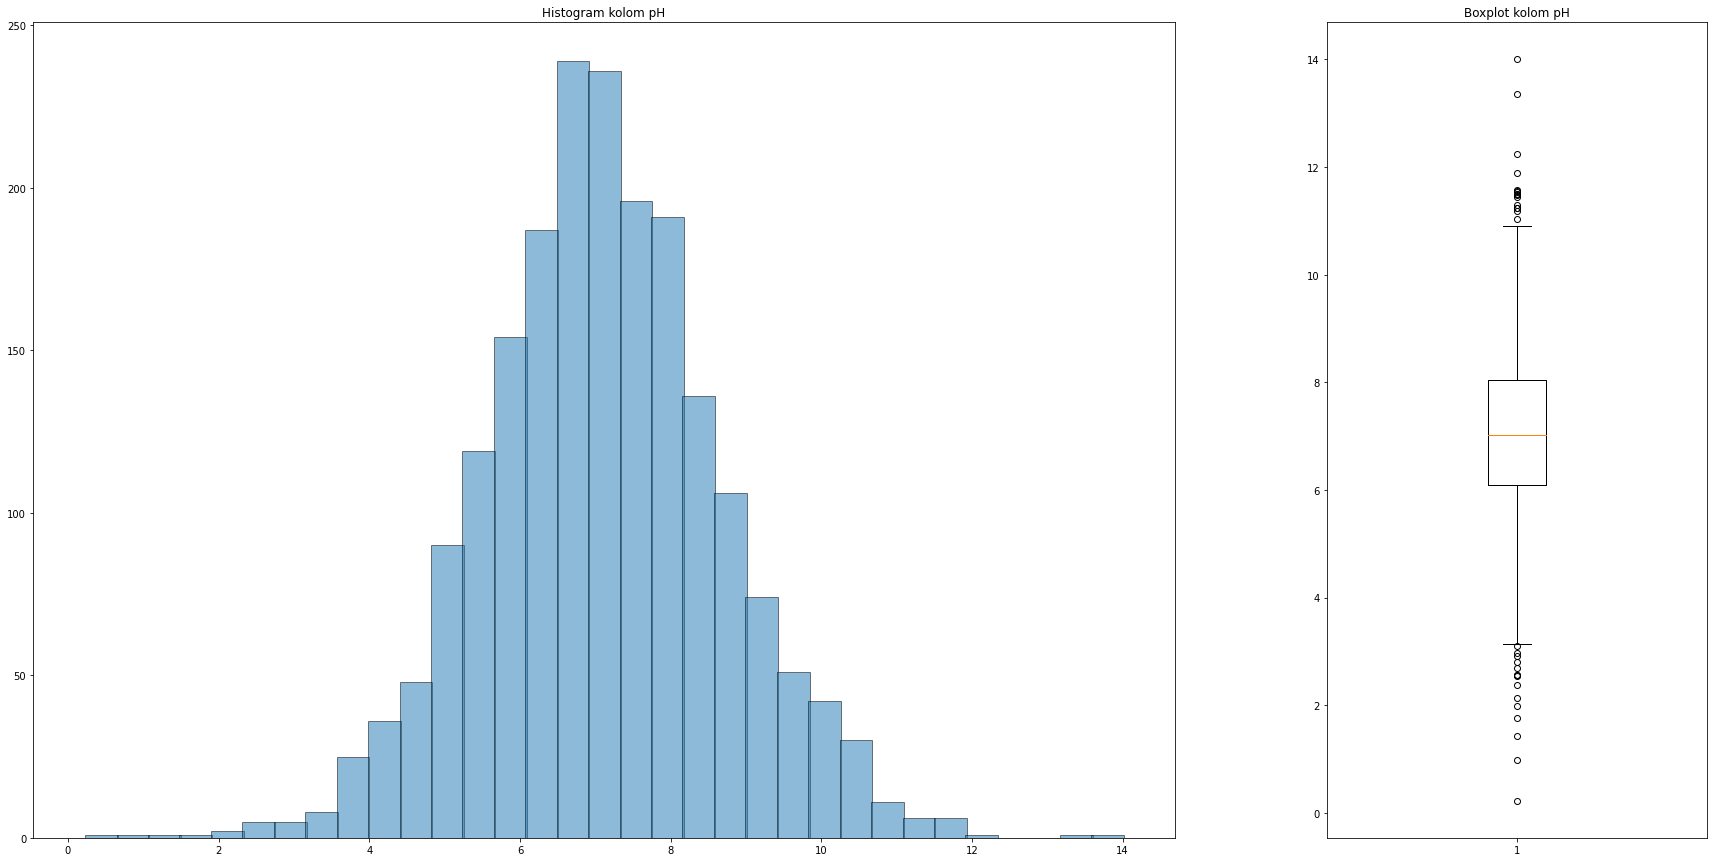

Skewness kolom pH adalah 0.04853451405270677
Kurtosis kolom pH adalah 0.6269041256617065
Untuk hardness

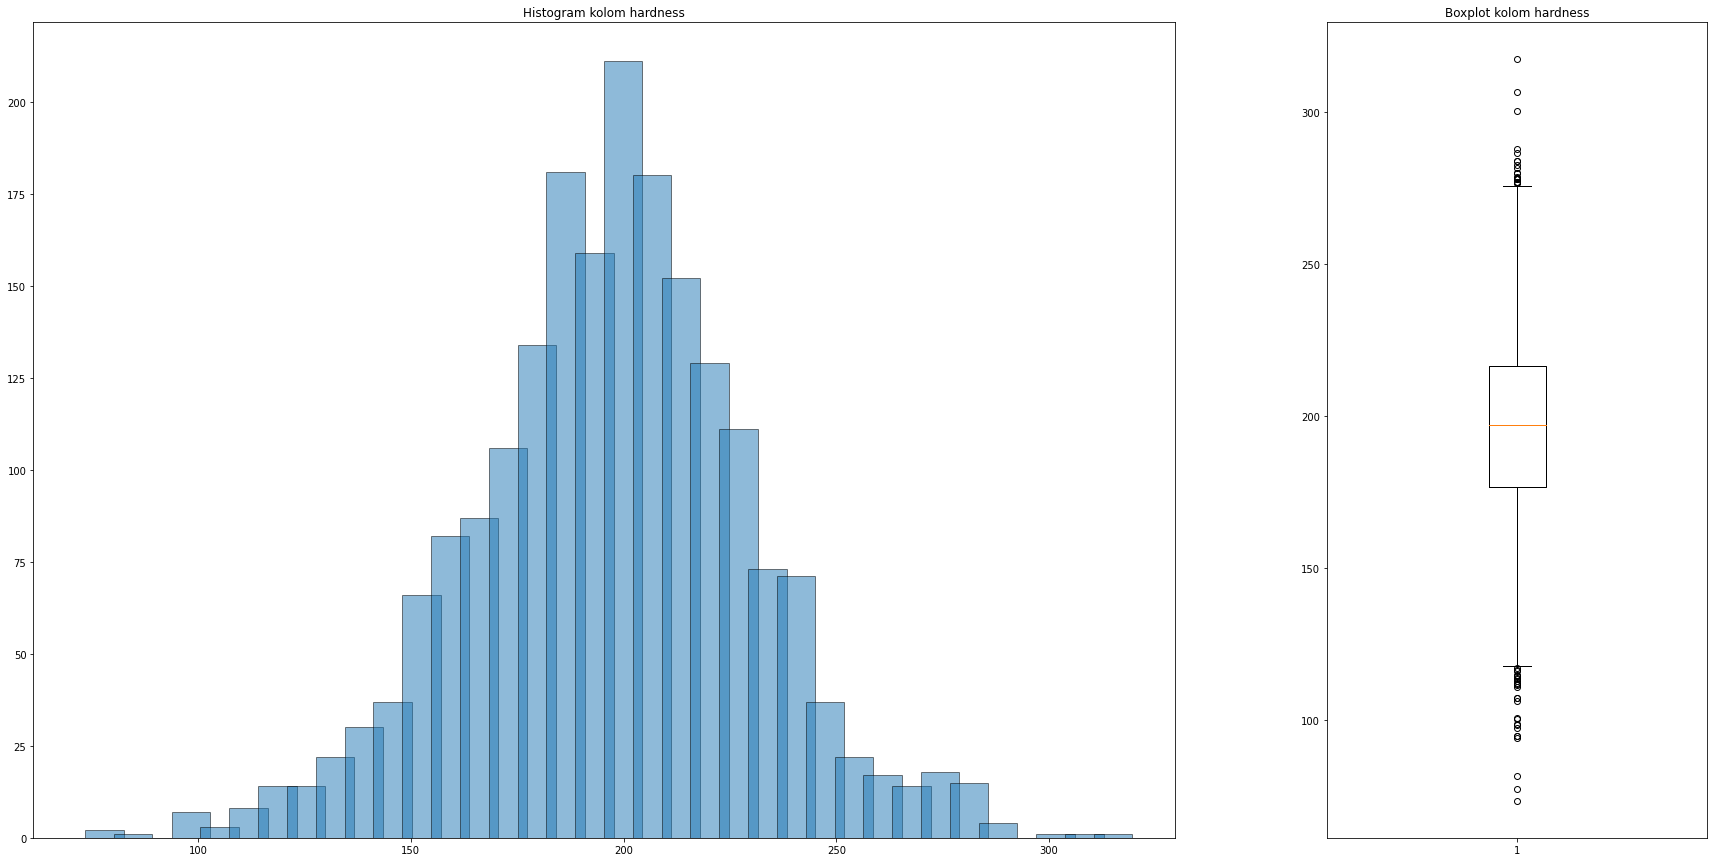

Skewness kolom hardness adalah -0.0853210417286861
Kurtosis kolom hardness adalah 0.5254804942991407
Untuk solids

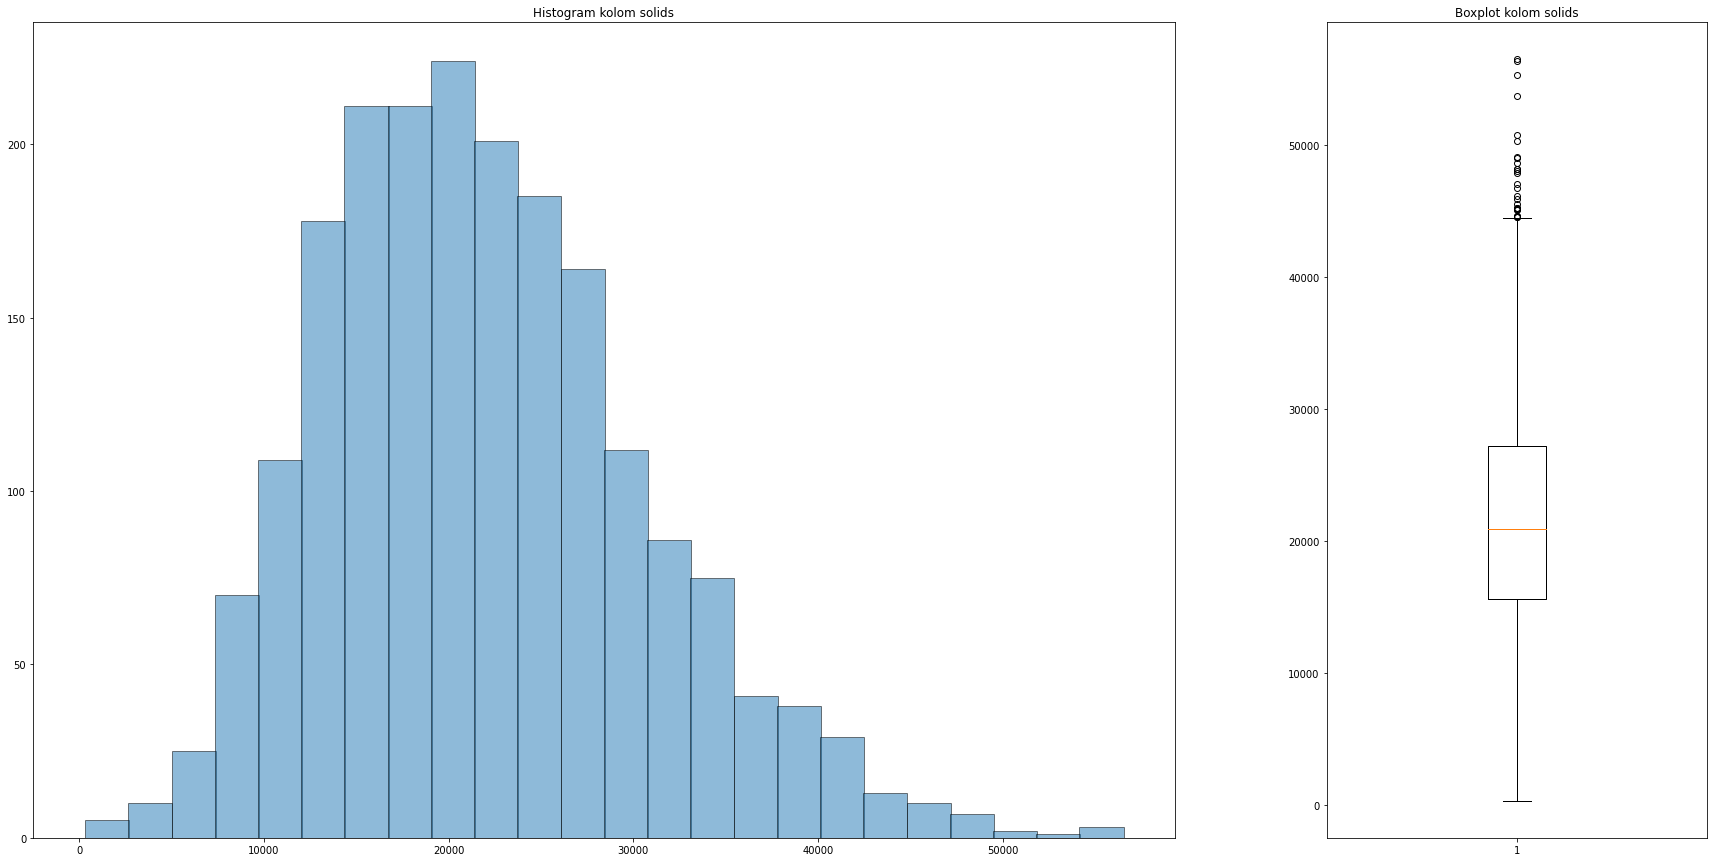

Skewness kolom solids adalah 0.5910113724580435
Kurtosis kolom solids adalah 0.33732026745944976
Untuk chloramines

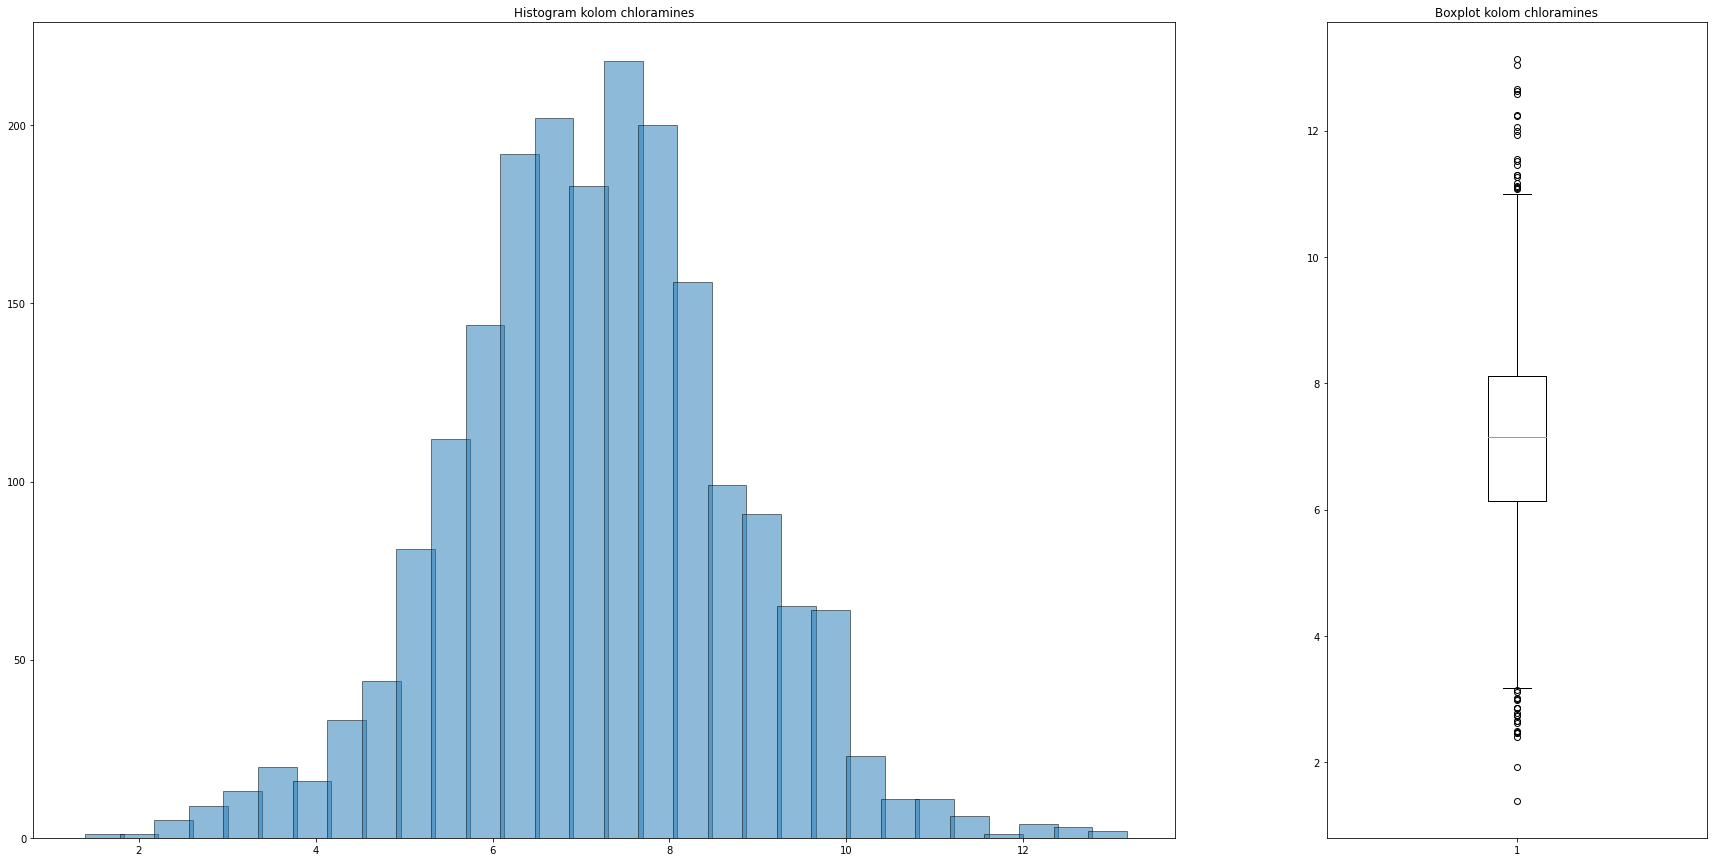

Skewness kolom chloramines adalah 0.01300349777956952
Kurtosis kolom chloramines adalah 0.5497821097667472
Untuk sulfate

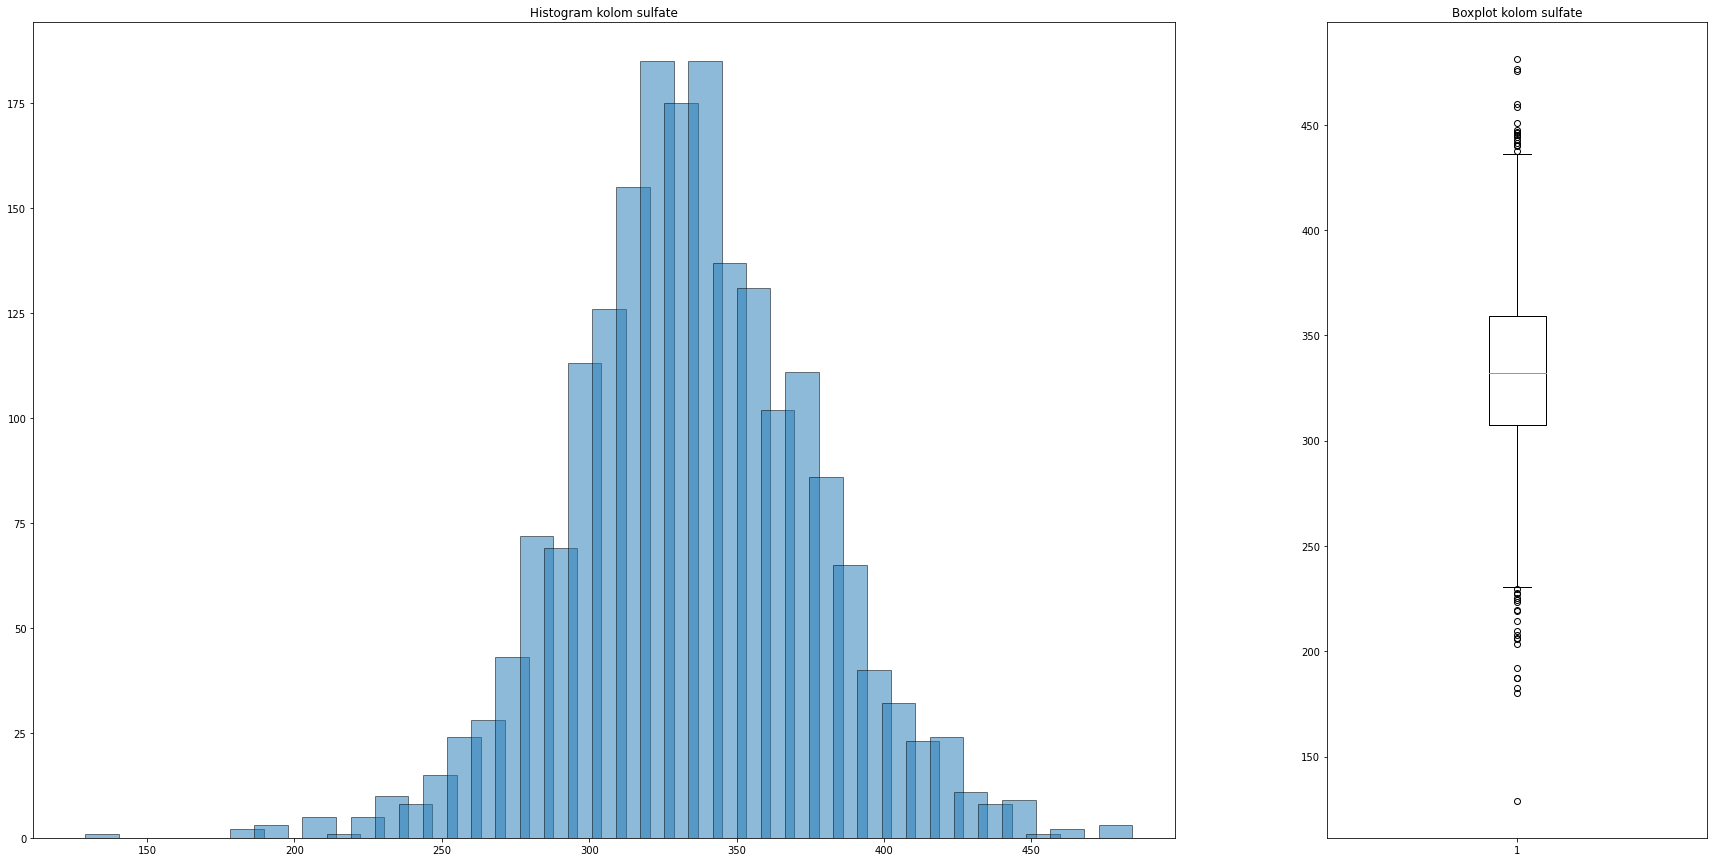

Skewness kolom sulfate adalah -0.04572780443653542
Kurtosis kolom sulfate adalah 0.7868544988131596
Untuk conductivity

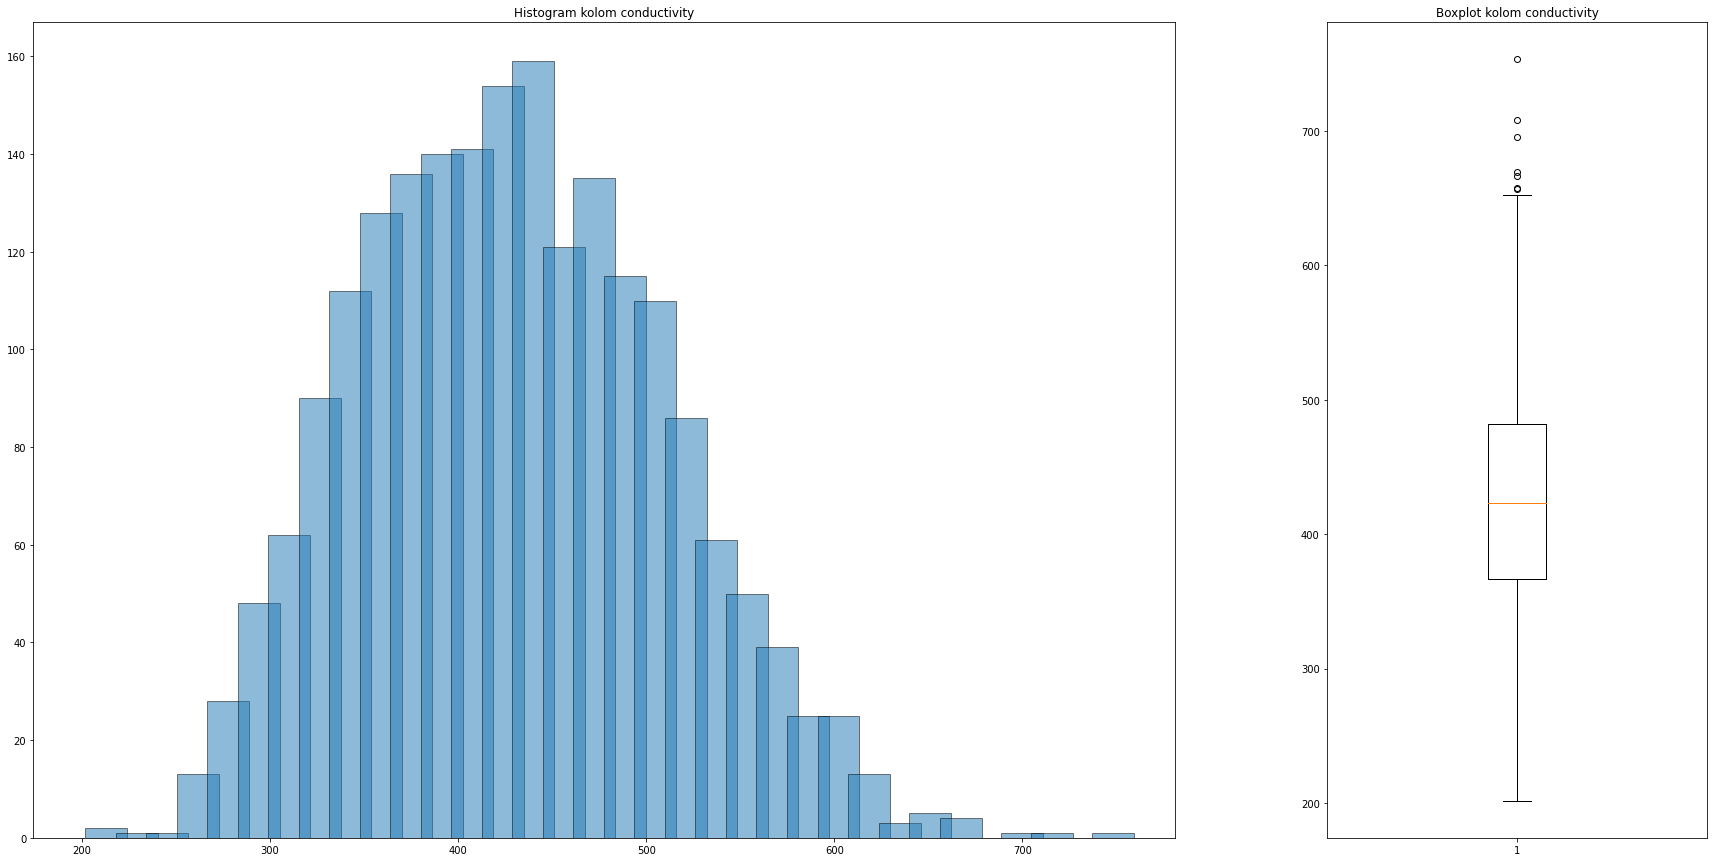

Skewness kolom conductivity adalah 0.26801233302645305
Kurtosis kolom conductivity adalah -0.23720600574806516
Untuk organicCarbon

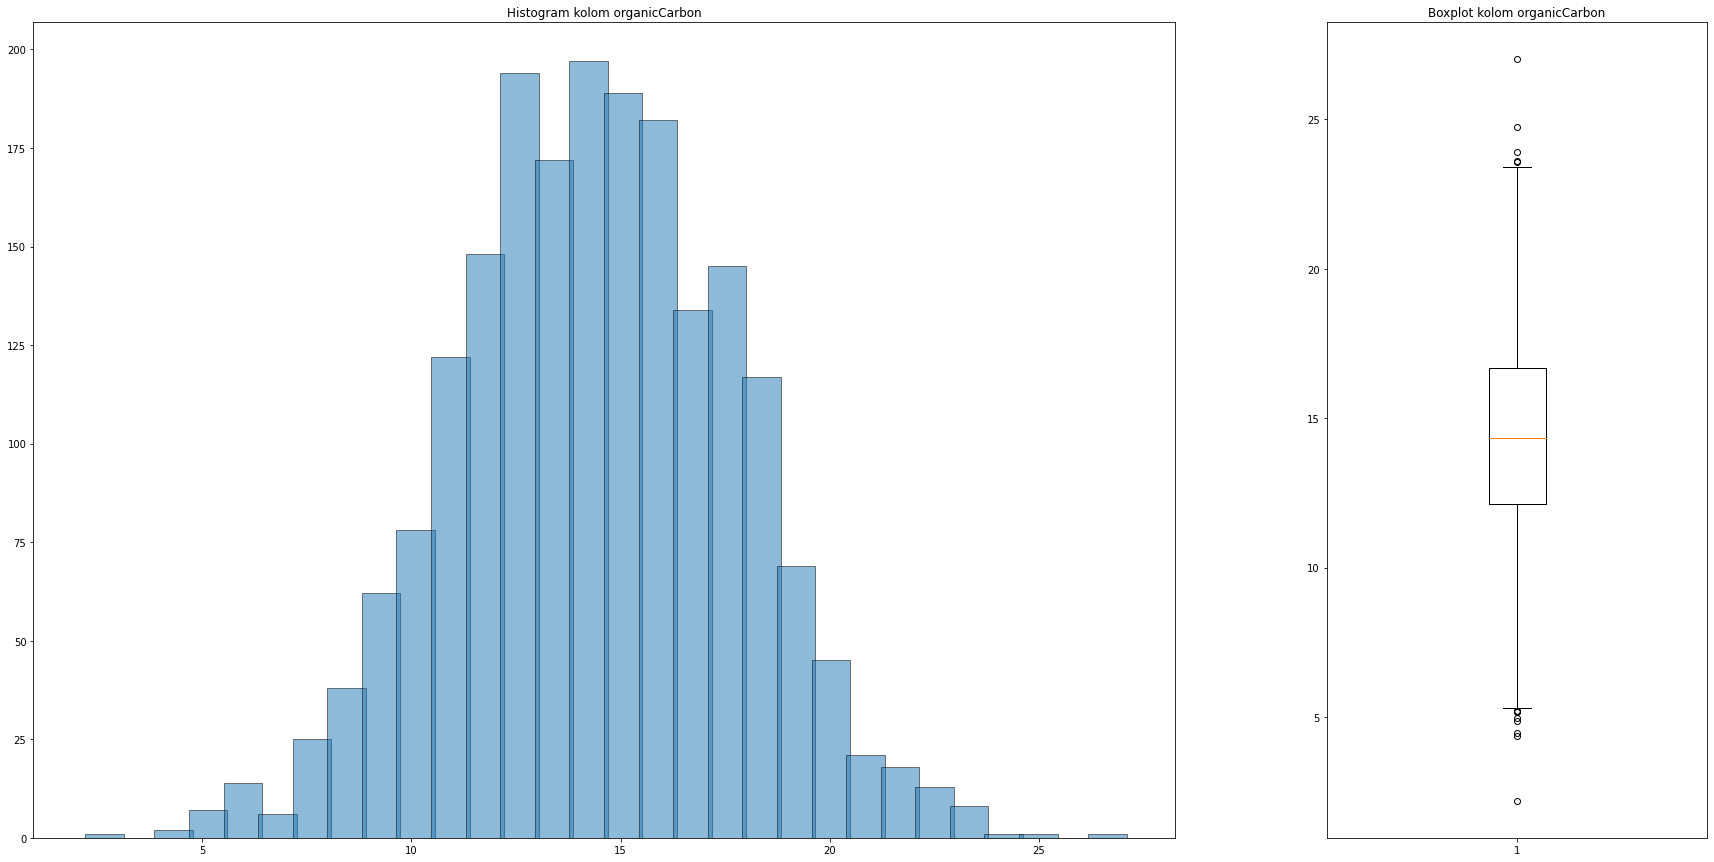

Skewness kolom organicCarbon adalah -0.020219756291812333
Kurtosis kolom organicCarbon adalah 0.031018388192251667
Untuk trihalomethanes

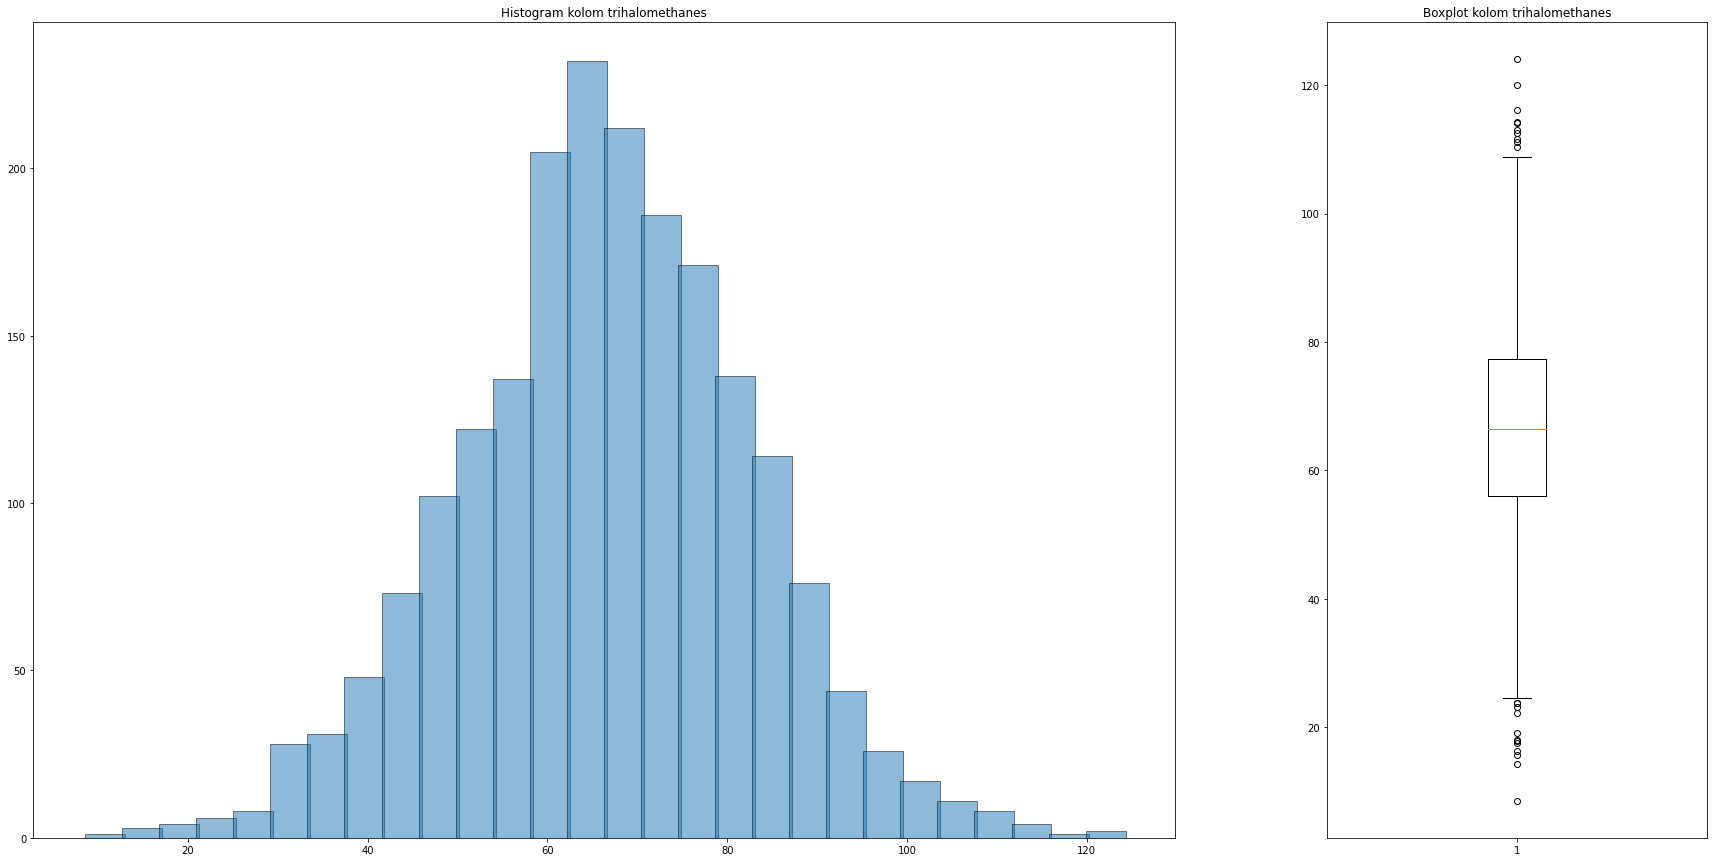

Skewness kolom trihalomethanes adalah -0.051382684516194765
Kurtosis kolom trihalomethanes adalah 0.2230167810639787
Untuk turbidity

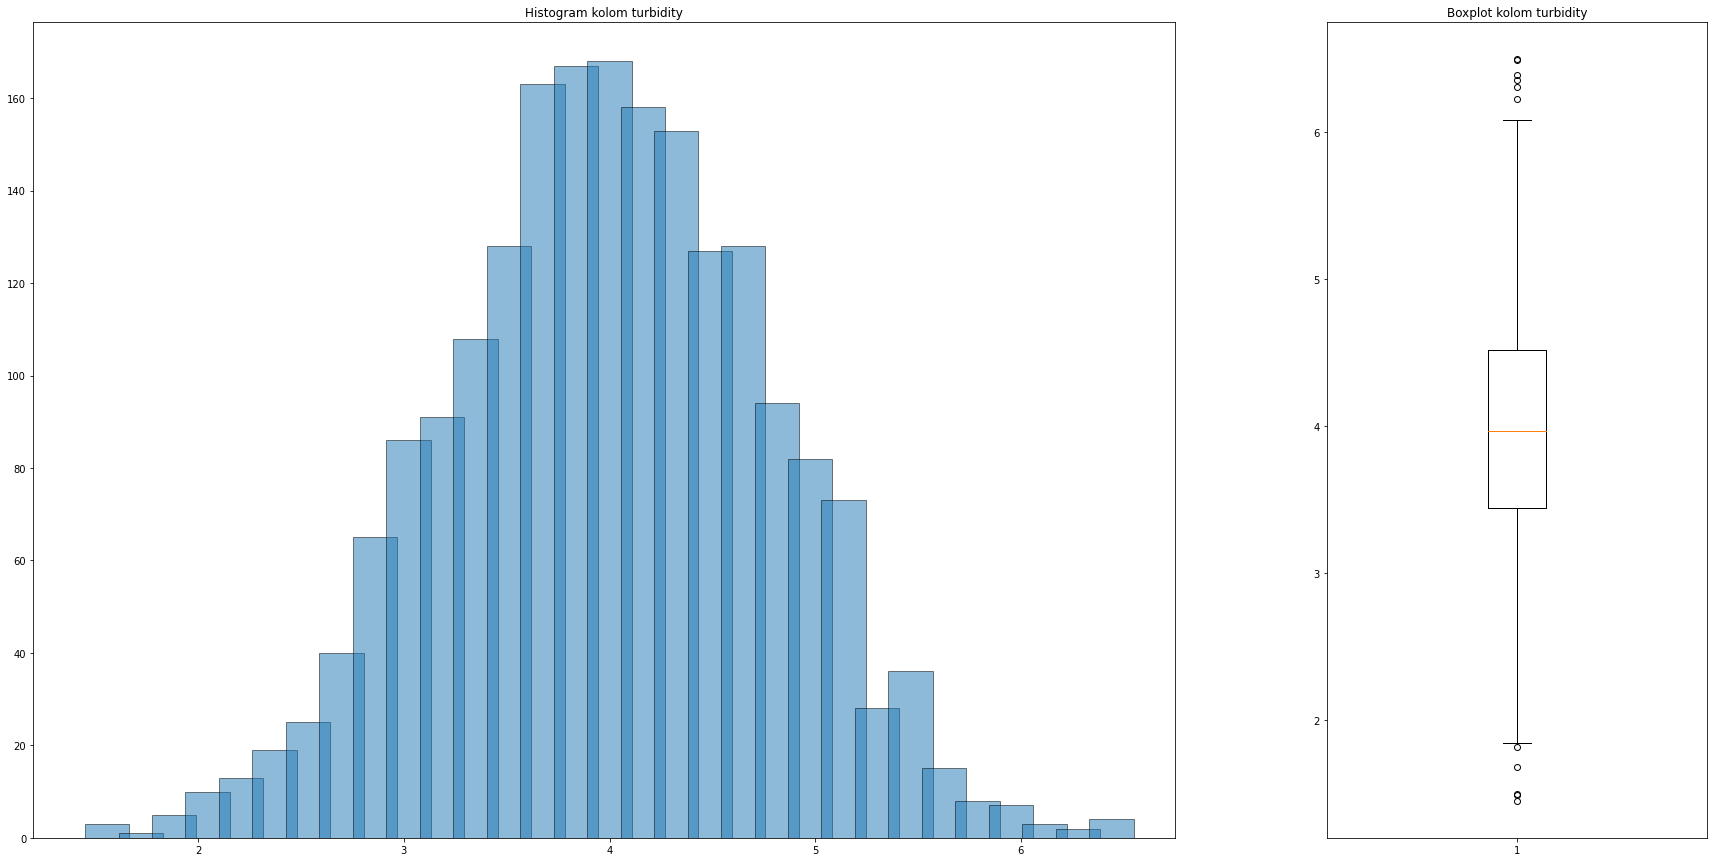

Skewness kolom turbidity adalah -0.032265979680192944
Kurtosis kolom turbidity adalah -0.04983079694925108


In [3]:
# NOMOR 2
# Membuat Visualisasi plot distribusi, dalam bentuk histogram dan boxplot untuk setiap
# kolom numerik. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot
# tersebut.
print("Jawaban Nomor 2:")
for idxColumn in data.columns[:-1]:
    print("Untuk " + idxColumn, end="")
    figure, axis = plt.subplots(1, 2, figsize=(30, 15), gridspec_kw={'width_ratios': [3, 1]})
    if idxColumn in data.columns:
        # Untuk membuat histogram
        # Dimulai dengan menentukan jumlah bin dan width yang tepat dengan menggunakan formula Scott's normal reference rule
        # Alasan penggunaan formula Sturges adalah karena secara implisit diasumsikan data yang dibentuk adalah sebuah distribusi normal
        # Rumus Scott's normal reference rule : h = (3.49 * sigma) / (n ** (1/3))
        # Dengan h adalah width, sigma adalah standar deviasi, dan n adalah jumlah data
        jumlahData = len(data[idxColumn])
        sigma = data[idxColumn].std()
        width = (3.49 * sigma) / (jumlahData ** (1/3))

        axis[0].hist(data[idxColumn].values, bins=math.ceil(data[idxColumn].max() / width), width=width, histtype='bar', ec='black', alpha=0.5)
        axis[0].set_title("Histogram kolom {}".format(idxColumn))

        # Untuk membuat boxplot
        axis[1].boxplot(data[idxColumn])
        axis[1].set_title("Boxplot kolom {}".format(idxColumn))

        plt.show()

        # Berikan skewness dan kurtosis histogram
        print(f"Skewness kolom {idxColumn} adalah {data[idxColumn].skew()}")
        print(f"Kurtosis kolom {idxColumn} adalah {data[idxColumn].kurt()}")

# URAIAN NOMOR 2
## Kolom pH
Berdasarkan histogram kolom pH dan nilai skewness serta kurtosis, terlihat bentuk yang simetris dan leptopkurtic. Kemudian, dari hasil boxplot, terlihat cukup banyak pencilan data baik di bawah dan atas IQR.

## Kolom Hardness
Berdasarkan hasil plot histogram, terlihat bahwa data cukup simetris, tetapi meruncing dan tipis di tengah. Lalu, dari hasil boxplot, ditemui cukup banyak pencilan data di bawah dan atas IQR, tetapi pencilan tersebar cukup merata di bawah dan atas IQR.

## Kolom Solids
Berdasarkan hasil plot histogram, terlihat bahwa data tidak simetris dan curam di kiri. Dari hasil boxplot, terlihat bahwa pencilan data hanya terdapat di bagian atas IQR.

## Kolom Chloramines
Berdasarkan hasil plot histogram, terlihat data cukup simetris, tetapi meruncing di tengah. Berdasarkan hasil boxplot, didapatkan pencilan data baik di atas maupun bawah IQR. Persebaran pencilan merata antara atas dan bawah IQR.

## Kolom Sulfate
Berdasarkan hasil plot histogram, data tidak terlihat simetris karena terdapat sebuah pencilan yang sangat jauh di kiri. Dari hasil boxplot, pencilan terdapat di atas dan bawah IQR, tetapi ada satu pencilan yang sangat jauh dari rata rata di bawah IQR.

## Kolom Conductivity
Berdasarkan hasil plot histogram, data tidak simetris, melainkan negatively skewed, sehingga terlihat curam kiri. Dari hasil boxplot didapatkan bahwa pencilan hanya terdapat di atas IQR.

## Kolom Organic Carbon
Bedasarkan hasil plot histogram, data terlihat cukup simetris dan tidak meruncing maupun datar di tengah. Hasil boxplot kolom organic carbon memperlihatkan bahwa terdapat pencilan data di atas maupun bawah IQR.

## Kolom Trihalomethanes
Berdasarkan hasil plot histogram, data terlihat cukup simetris. Boxplot kolom trihalomethanes menunjukkan pencilan data yang dimiliki oleh kolom ini tersebar merata di atas dan bawah IQR.

## Kolom Turbidity
Berdasarkan hasil plot histogram, data terlihat simetris dan tidak meruncing maupun mendatar di tengah. Hasil boxplot kolom ini menunjukkan terdapat pencilan data di atas dan bawah IQR.

# NOMOR 3
## KOLOM pH
Nilai skewness kolom pH mendekati 0, sehingga data bersifat simetris. Hal tersebut terlihat dari histogram kolom pH yang simetris tanpa ekor kanan atau kiri yang lebih panjang. Namun, nilai kurtosis kolom pH jauh dari 0, sehingga histogram disebut leptokurtic, yaitu bentuknya kurus dan lancip. Karena histogram leptokurtic, kolom pH tidak berdistribusi normal.

## KOLOM Hardness
Meskipun negatif, nilai skewness kolom hardness mendekati 0, sehingga data bersifat simetris. Hal tersebut terlihat dari histogram kolom hardness yang simetris tanpa ekor kanan atau kiri yang lebih panjang. Namun, nilai kurtosis kolom hardness jauh dari 0, sehingga histogram disebut leptokurtic. Karena histogram leptokurtic, kolom hardness tidak berdistribusi normal.

## KOLOM Solids
Kolom Solids memiliki nilai skewness yang positif, sehingga data tidak simetris, melainkan *positive skew*. Dapat dibuktikan dari histogram kolom solids terlihat bahwa histogram memiliki "ekor" di kanan dan tidak simetris. Namun, nilai kurtosis kolom solids mendekati 0, sehingga histogram disebut mesokurtic. Karena histogram *positive skew*, kolom solids tidak berdistribusi normal.

## KOLOM Chloramines
Kolom Chloramines memiliki nilai skewness yang mendekati 0 sehingga histogram simetris. Hal tersebut juga dapat dibuktikan dari histogram yang berbentuk simetris. Namun, nilai kurtosis dari kolom chloramines jauh dari 0 dan bernilai positif sehingga histogram disebut leptokurtic. Karena histogram leptokurtic, kolom chloramines tidak berdistribusi normal.

## KOLOM Sulfate
Meskipun negatif, kolom Sulfate memiliki nilai skewness yang mendekati 0 sehingga histogram simetris. Hal tersebut juga dapat dibuktikan dari histogram yang berbentuk simetris. Namun, nilai kurtosis dari kolom Sulfate jauh dari 0 dan bernilai positif sehingga histogram disebut leptokurtic. Karena histogram leptokurtic, kolom Sulfate tidak berdistribusi normal.

## KOLOM Conductivity
Nilai skewness dari kolom conductivity mendekati 0. Meskipun begitu, bentuk histogram kolom conductivity memiliki ekor yang lebih panjang di kanan atau *positive skew*. Hal ini disebabkan oleh ekor kanan yang sangat pipih dan ekor kiri yang sangat curam dan gendut sehingga nilai skewness tetap mendekati 0. Nilai kurtosis dari kolom conductivity mendekati 0 sehingga histogram disebut mesokurtic. Karena histogram *positive skew*, kolom conductivity tidak berdistribusi normal.

## KOLOM Organic carbon
Nilai skewness dari kolom organic carbon mendekati 0 sehingga histogram simetris. Hal tersebut dapat dibuktikan dari bentuk histogram yang simetris. Selain itu, nilai kurtosis kolom organic carbon mendekati 0 sehingga histogram disebut mesokurtic. Karena histogram mesokurtic dan simetris, kolom organic carbon berdistribusi normal.

## KOLOM Trihalomethanes
Meskipun negatif, nilai skewness dari kolom trihalomethanes mendekati 0 sehingga histogram simetris. Hal tersebut dapat dibuktikan dari bentuk histogram yang simetris. Selain itu, nilai kurtosis kolom trihalomethanes mendekati 0 sehingga histogram disebut mesokurtic. Karena histogram mesokurtic dan simetris, kolom trihalomethanes berdistribusi normal.

## KOLOM Turbidity
Meskipun negatif, nilai skewness dari kolom turbidity mendekati 0 sehingga histogram simetris. Hal tersebut dapat dibuktikan dari bentuk histogram yang simetris. Selain itu, nilai kurtosis kolom turbidity mendekati 0 sehingga histogram disebut mesokurtic. Karena histogram mesokurtic dan simetris, kolom turbidity berdistribusi normal.

## Jawaban Nomor 4
Melakukan tes hipotesis 1 sampel dengan menuliskan 6 langkah testing dan menampilkan juga boxplotnya untuk kolom/bagian yang bersesuaian.
Enam langkah testing:
1. Tentukan Hipotesis nol (H0: θ = θ0), dimana θ bisa berupa μ, σ2, p, atau data lain berdistribusi tertentu (normal, binomial, dsc.).

2. Pilih hipotesis alternatif H1 salah dari dari θ > θ0, θ < θ0, atau θ ≠ θ0.

3. Tentukan tingkat signifikan α.

4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.

5. Hitung nilai uji statistik dari data sample. Hitung p-value sesuai dengan uji statistik yang
digunakan.

6. Ambil keputusan dengan TOLAK H0 jika nilai uji terletak di daerah kritis atau dengan tes signifikan, TOLAK H0 jika p-value lebih kecil dibanding tingkat signifikansi α yang diinginkan.



In [ ]:
# 4a. Buktikan apakah nilai rata-rata pH di atas 7
print("4a. Buktikan apakah nilai rata-rata pH di atas 7")

# Langkah 1 : Tentukan hipotesis nol H0
# Untuk kasus ini, karena kita membandingkan nilai rata-rata pH dengan 7, maka hipotesis nol adalah μ = μ0 dengan μ0 = 7

# Langkah 2 : Tentukan hipotesis alternatif H1
# Untuk kasus ini, kita menggunakan hipotesis alternatif H1 μ > μ0 atau μ > 7

# Langkah 3 : Tentukan tingkat signifikan α
# Untuk kasus ini, kita menggunakan tingkat signifikan α = 0.05
alpha = 0.05

# Langkah 4 : Tentukan uji statistik yang sesuai dan tentukan daerah kritis
# Bila hipotesis alternatif H1 ingin diterima (atau jika ingin menolak H0 kasus ini), maka daerah kritis yang harus dipenuhi adalah z > z_alpha
# Pengujian ini tergolong tes hipotesis satu arah karena tidak ada dua nilai sebagai batas atas/bawah dari daerah kritis, melainkan hanya ada satu saja
# Nilai z sendiri dapat dihitung menggunakan: z = (x_bar - μ0) / (sigma / sqrt(n))

# Langkah 5 : Hitung nilai uji statistik dari data sample dan hitung p-value
z_score = (data['pH'].mean() - 7) / (data['pH'].std() / math.sqrt(len(data['pH'])))
# scipy.norm.ppf(val) adalah fungsi yang digunakan untuk mencari dan mengembalikan titik sumbu x di kurva distribusi normal, dinamakan aX
# sehingga luas di bawah kurva dari -inf sampai aX adalah val
z_alpha_score = st.norm.ppf(1 - alpha)
# scipy.norm.cdf(val) adalah fungsi yang digunakan untuk mencari luas kurva distribusi normal dalam range -inf sampai val. Atau P(Z <= z) = val 
# scipy.norm.sf(val) = 1 - scipy.norm.cdf(-val), namun fungsi scipy.norm.sf menurut dokumentasi scipy lebih akurat dari 1 - scipy.norm.cdf()
if z_score > 0:
    p_value = st.norm.sf(z_score)    
else:
    p_value = st.norm.cdf(z_score)

print("Nilai z: {z}".format(z=z_score))
print("Nilai z_alpha: {z_alpha}".format(z_alpha=z_alpha_score))
print("Nilai p-value: {p_value}".format(p_value=p_value))

# Langkah 6 : Pengambilan keputusan
if z_score > z_alpha_score:
    if p_value > alpha:
        print("Hipotesis nol H0 gagal ditolak")
        print("Karena meskipun nilai z = {z} > z_alpha = {z_alpha}, nilai p-value = {p_value} > alpha = {alpha}".format(z=z_score, z_alpha=z_alpha_score, p_value=p_value, alpha=alpha))
    else:
        print("Hipotesis nol H0 ditolak dan mengambil hipotesis alternatif H1")
        print("Karena nilai z = {z} > z_alpha = {z_alpha} dan nilai p-value = {p_value} < alpha = {alpha}".format(z=z_score, z_alpha=z_alpha_score, p_value=p_value, alpha=alpha))
        print("Artinya, nilai rata-rata pH di atas 7")
else:
    print("Hipotesis nol H0 diterima karena nilai z = {z} <= z_alpha = {z_alpha}".format(z=z_score, z_alpha=z_alpha_score))
    print("Artinya, nilai rata-rata pH adalah 7")

# Penampilan Boxplot
plt.boxplot(data['pH'])
plt.title("Boxplot pH")
plt.show()
# Dapat dilihat dari boxplot bahwa rata-rata (garis tengah pada kotak) pH sedikit lebih besar dari 7

In [ ]:
# 4b. Buktikan apakah nilai rata-rata "hardness" tidak sama dengan 205
print("4b. Buktikan apakah nilai rata-rata hardness tidak sama dengan 205")

# Langkah 1 : Tentukan hipotesis nol H0
# Untuk kasus ini, karena kita membandingkan nilai rata-rata hardness dengan 205, maka hipotesis nol adalah μ = μ0 dengan μ0 = 205

# Langkah 2 : Tentukan hipotesis alternatif H1
# Untuk kasus ini, kita menggunakan hipotesis alternatif H1 μ ≠ μ0 atau μ ≠ 205

# Langkah 3 : Tentukan tingkat signifikan α
# Untuk kasus ini, kita menggunakan tingkat signifikan α = 0.05
alpha = 0.05

# Langkah 4 : Tentukan uji statistik yang sesuai dan tentukan daerah kritis
# Bila ingin menolak H0 kasus ini, maka daerah kritis yang harus dipenuhi adalah z < -z_(alpha/2) atau z > z_(alpha/2)
# Pengujian ini tergolong tes hipotesis dua arah karena terdapat dua parameter sebagai daerah kritis
# Nilai z sendiri dapat dihitung menggunakan: z = (x_bar - μ0) / (sigma / sqrt(n))

# Langkah 5 : Hitung nilai uji statistik dari data sample dan hitung p-value
z_score = (data['hardness'].mean() - 205) / (data['hardness'].std() / math.sqrt(len(data['hardness'])))
# scipy.norm.ppf(val) adalah fungsi yang digunakan untuk mencari dan mengembalikan titik sumbu x di kurva distribusi normal, dinamakan aX
# sehingga luas di bawah kurva dari -inf sampai aX adalah val
z_alpha_score = st.norm.ppf(1 - alpha / 2)
# scipy.norm.cdf(val) adalah fungsi yang digunakan untuk mencari luas kurva distribusi normal dalam range -inf sampai val. Atau P(Z <= z) = val 
# scipy.norm.sf(val) = 1 - scipy.norm.cdf(-val), namun fungsi scipy.norm.sf menurut dokumentasi scipy lebih akurat dari 1 - scipy.norm.cdf()
if z_score > 0:
    p_value = 2 * st.norm.sf(z_score)
else:
    p_value = 2 * st.norm.cdf(z_score)

print("Nilai z: {z}".format(z=z_score))
print("Nilai z_alpha: {z_alpha}".format(z_alpha=z_alpha_score))
print("Nilai p-value: {p_value}".format(p_value=p_value))

# Langkah 6 : Pengambilan keputusan
if z_score > z_alpha_score or z_score < -1 * z_alpha_score:
    if p_value > alpha:
        print("Hipotesis nol H0 gagal ditolak")
        print("Karena meskipun nilai z = {z} > z_alpha = {z_alpha}, nilai p-value = {p_value} > alpha = {alpha}".format(z=z_score, z_alpha=z_alpha_score, p_value=p_value, alpha=alpha))
    else:
        print("Hipotesis nol H0 ditolak dan mengambil hipotesis alternatif H1")
        print("Karena nilai z = {z} > z_alpha = {z_alpha} dan nilai p-value = {p_value} < alpha = {alpha}".format(z=z_score, z_alpha=z_alpha_score, p_value=p_value, alpha=alpha))
        print("Artinya, nilai rata-rata hardness tidak sama dengan 205")
else:
    print("Hipotesis nol H0 diterima karena nilai z = {z} <= z_alpha = {z_alpha}".format(z=z_score, z_alpha=z_alpha_score))
    print("Artinya, nilai rata-rata hardness sama dengan 205")

# Penampilan Boxplot
plt.boxplot(data['hardness'])
plt.title("Boxplot hardness")
plt.show()
# Dapat dilihat dari boxplot bahwa rata-rata (garis tengah pada kotak) hardness sedikit tidak sama dengan 205

In [ ]:
# 4c. Buktikan apakah nilai rata-rata 100 baris pertama kolom "solids" tidak sama dengan 21900
print("4c. Buktikan apakah nilai rata-rata hardness tidak sama dengan 205")
newData = data.head(100)

# Langkah 1 : Tentukan hipotesis nol H0
# Untuk kasus ini, karena kita membandingkan nilai rata-rata hardness dengan 21900, maka hipotesis nol adalah μ = μ0 dengan μ0 = 21900

# Langkah 2 : Tentukan hipotesis alternatif H1
# Untuk kasus ini, kita menggunakan hipotesis alternatif H1 μ ≠ μ0 atau μ ≠ 21900

# Langkah 3 : Tentukan tingkat signifikan α
# Untuk kasus ini, kita menggunakan tingkat signifikan α = 0.05
alpha = 0.05

# Langkah 4 : Tentukan uji statistik yang sesuai dan tentukan daerah kritis
# Bila ingin menolak H0 kasus ini, maka daerah kritis yang harus dipenuhi adalah z < -z_(alpha/2) atau z > z_(alpha/2)
# Pengujian ini tergolong tes hipotesis dua arah karena terdapat dua parameter sebagai daerah kritis
# Nilai z sendiri dapat dihitung menggunakan: z = (x_bar - μ0) / (sigma / sqrt(n))

# Langkah 5 : Hitung nilai uji statistik dari data sample dan hitung p-value
z_score = (newData['solids'].mean() - 21900) / (newData['solids'].std() / math.sqrt(len(data['solids'])))
# scipy.norm.ppf(val) adalah fungsi yang digunakan untuk mencari dan mengembalikan titik sumbu x di kurva distribusi normal, dinamakan aX
# sehingga luas di bawah kurva dari -inf sampai aX adalah val
z_alpha_score = st.norm.ppf(1 - alpha / 2)
# scipy.norm.cdf(val) adalah fungsi yang digunakan untuk mencari luas kurva distribusi normal dalam range -inf sampai val. Atau P(Z <= z) = val 
# scipy.norm.sf(val) = 1 - scipy.norm.cdf(val), namun fungsi scipy.norm.sf menurut dokumentasi scipy lebih akurat dari 1 - scipy.norm.cdf()
if z_score > 0:
    p_value = 2 * st.norm.sf(z_score)
else:
    p_value = 2 * st.norm.cdf(z_score)

print("Nilai z: {z}".format(z=z_score))
print("Nilai z_alpha: {z_alpha}".format(z_alpha=z_alpha_score))
print("Nilai p-value: {p_value}".format(p_value=p_value))

# Langkah 6 : Pengambilan keputusan
if z_score > z_alpha_score or z_score < -1 * z_alpha_score:
    if p_value > alpha:
        print("Hipotesis nol H0 gagal ditolak")
        print("Karena meskipun nilai z = {z} > z_alpha = {z_alpha}, nilai p-value = {p_value} > alpha = {alpha}".format(z=z_score, z_alpha=z_alpha_score, p_value=p_value, alpha=alpha))
    else:
        print("Hipotesis nol H0 ditolak dan mengambil hipotesis alternatif H1")
        print("Karena nilai z = {z} > z_alpha = {z_alpha} dan nilai p-value = {p_value} < alpha = {alpha}".format(z=z_score, z_alpha=z_alpha_score, p_value=p_value, alpha=alpha))
        print("Artinya, nilai rata-rata 100 kolom pertama solids tidak sama dengan 21900")
else:
    print("Hipotesis nol H0 diterima karena nilai z = {z} <= z_alpha = {z_alpha}".format(z=z_score, z_alpha=z_alpha_score))
    print("Artinya, nilai rata-rata 100 kolom pertama solids sama dengan 21900")

# Penampilan Boxplot
plt.boxplot(newData['solids'])
plt.title("Boxplot solids")
plt.show()
# Dapat dilihat dari boxplot bahwa rata-rata (garis tengah pada kotak) hardness sedikit tidak sama dengan 205

In [ ]:
# 4d. Buktikan apakah proporsi nilai conductivity yang lebih dari 450 tidak sama dengan 10%
print("4d. Buktikan apakah proporsi nilai conductivity yang lebih dari 450 tidak sama dengan 10%")
conductAbove450Data = data.loc[data['conductivity'] > 450]

# Langkah 1 : Tentukan hipotesis nol H0
# Untuk kasus ini, karena kita membandingkan proporsi nilai conductivity yang lebih besar dari 450 dengan kuantitas 10%, maka hipotesis nol adalah p = p0 dengan p0 = 10% atau 1 dari 10

# Langkah 2 : Tentukan hipotesis alternatif H1
# Untuk kasus ini, kita menggunakan hipotesis alternatif H1 p ≠ p0 atau p ≠ 0.1

# Langkah 3 : Tentukan tingkat signifikan α
# Untuk kasus ini, kita menggunakan tingkat signifikan α = 0.05
alpha = 0.05

# Langkah 4 : Tentukan uji statistik yang sesuai dan tentukan daerah kritis
# Bila ingin menolak H0 kasus ini, maka daerah kritis yang harus dipenuhi adalah p_value lebih kecil dari alpha
# p_value dapat dihitung dengan menggunakan distribusi binomial untuk n kecil
# p_value = 2P(X <= x, p=p0) untuk x < n * p0, atau
# p_value = 2P(X >= x, p=p0) untuk x > n * p0
# Untuk n bernilai besar, dapat digunakan aproksimasi Z_score dengan pendekatan binomial menuju distribusi normal
# z_score = (x - n * p0) / sqrt(n * p0 * (1 - p0))
# Untuk H1 p ≠ p0, daerah kritisnya adalah z < -z_(alpha/2) atau z > z_(alpha/2)
x = len(conductAbove450Data['conductivity'])
n = len(data['conductivity'])
p0 = 0.1

# Langkah 5 : Hitung nilai uji statistik dari data sample (z-score) dan hitung p-value
z_score = (x - n * p0) / math.sqrt(n * p0 * (1 - p0))
z_alpha_score = st.norm.ppf(1 - alpha / 2)
if z_score > 0:
    p_value = 2 * st.norm.sf(z_score)
else:
    p_value = 2 * st.norm.cdf(z_score)

print("Nilai z: {z}".format(z=z_score))
print("Nilai z_alpha: {z_alpha}".format(z_alpha=z_alpha_score))
print("Nilai p-value: {p_value}".format(p_value=p_value))

# Langkah 6 : Pengambilan keputusan
if z_score > z_alpha_score or z_score < -1 * z_alpha_score:
    if p_value > alpha:
        print("Hipotesis nol H0 gagal ditolak")
        print("Karena meskipun nilai z = {z} > z_alpha = {z_alpha}, nilai p-value = {p_value} > alpha = {alpha}".format(z=z_score, z_alpha=z_alpha_score, p_value=p_value, alpha=alpha))
    else:
        print("Hipotesis nol H0 ditolak dan mengambil hipotesis alternatif H1")
        print("Karena nilai z = {z} > z_alpha = {z_alpha} dan nilai p-value = {p_value} < alpha = {alpha}".format(z=z_score, z_alpha=z_alpha_score, p_value=p_value, alpha=alpha))
        print("Artinya, proporsi nilai conductivity yang lebih dari 450 tidak sama dengan 10%")
else:
    print("Hipotesis nol H0 diterima karena nilai z = {z} <= z_alpha = {z_alpha}".format(z=z_score, z_alpha=z_alpha_score))
    print("Artinya, proporsi nilai conductivity yang lebih dari 450 sama dengan 10%")

# Penampilan Boxplot
plt.boxplot(conductAbove450Data['conductivity'])
plt.title("Boxplot conductivity yang nilainya lebih dari 450")
plt.show()

In [ ]:
# 4e. Buktikan apakah proporsi nilai trihalomethanes yang kurang dari 40 adalah kurang dari 5%
print("4e. Buktikan apakah proporsi nilai trihalomethanes yang kurang dari 40 adalah kurang dari 5%")
trihaloBelow40Data = data.loc[data['trihalomethanes'] < 40]

# Langkah 1 : Tentukan hipotesis nol H0
# Untuk kasus ini, karena kita membandingkan proporsi nilai trihalo yang kurang dari 40 dengan kuantitas 5%, maka hipotesis nol adalah p = p0 dengan p0 = 5% atau 1 dari 5

# Langkah 2 : Tentukan hipotesis alternatif H1
# Untuk kasus ini, kita menggunakan hipotesis alternatif H1 p < p0 atau p < 0.05

# Langkah 3 : Tentukan tingkat signifikan α
# Untuk kasus ini, kita menggunakan tingkat signifikan α = 0.05
alpha = 0.05

# Langkah 4 : Tentukan uji statistik yang sesuai dan tentukan daerah kritis
# Bila ingin menolak H0 kasus ini, maka daerah kritis yang harus dipenuhi adalah p_value lebih kecil dari alpha
# p_value dapat dihitung dengan menggunakan distribusi binomial untuk n kecil
# p_value = 2P(X <= x, p=p0) untuk x < n * p0, atau
# p_value = 2P(X >= x, p=p0) untuk x > n * p0
# Untuk n bernilai besar, dapat digunakan aproksimasi Z_score dengan pendekatan binomial menuju distribusi normal
# z_score = (x - n * p0) / sqrt(n * p0 * (1 - p0))
# Untuk H1 p < p0, daerah kritisnya adalah z < -z_(alpha)
x = len(trihaloBelow40Data['trihalomethanes'])
n = len(data['trihalomethanes'])
p0 = 0.05

# Langkah 5 : Hitung nilai uji statistik dari data sample (z-score) dan hitung p-value
z_score = (x - n * p0) / math.sqrt(n * p0 * (1 - p0))
z_alpha_score = st.norm.ppf(1 - alpha)
if z_score > 0:
    p_value = st.norm.sf(z_score)
else:
    p_value = st.norm.cdf(z_score)

print("Nilai z: {z}".format(z=z_score))
print("Nilai z_alpha: {z_alpha}".format(z_alpha=z_alpha_score))
print("Nilai p-value: {p_value}".format(p_value=p_value))

# Langkah 6 : Pengambilan keputusan
if z_score < -1 * z_alpha_score:
    if p_value > alpha:
        print("Hipotesis nol H0 gagal ditolak")
        print("Karena meskipun nilai z = {z} < -z_alpha = {z_alpha}, nilai p-value = {p_value} > alpha = {alpha}".format(z=z_score, z_alpha=-1*z_alpha_score, p_value=p_value, alpha=alpha))
    else:
        print("Hipotesis nol H0 ditolak dan mengambil hipotesis alternatif H1")
        print("Karena nilai z = {z} < -z_alpha = {z_alpha} dan nilai p-value = {p_value} < alpha = {alpha}".format(z=z_score, z_alpha=-1*z_alpha_score, p_value=p_value, alpha=alpha))
        print("Artinya, proporsi nilai trihalomethanes yang lebih dari 40 kurang dari 5%")
else:
    print("Hipotesis nol H0 diterima karena nilai z = {z} > -z_alpha = {z_alpha}".format(z=z_score, z_alpha=-1*z_alpha_score))
    print("Artinya, proporsi nilai trihalomethanes yang lebih dari 40 sama dengan 5%")

# Penampilan Boxplot
plt.boxplot(trihaloBelow40Data['trihalomethanes'])
plt.title("Boxplot trihalomethanes yang nilainya kurang dari 40")
plt.show()

In [ ]:
# Nomor 5, melakukan tes hipotesis 2 sampel dengan menuliskan enam langkah testing dan menampilkan juga boxplotnya untuk kolom/bagian yang bersesuaian

# 5a. Data kolom sulfat dibagi 2 sama rata, bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?
print("5a. Data kolom sulfat dibagi 2 sama rata, bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?")
sulfat1stHalfData = data.head(int(len(data)/2))['sulfate']
sulfat2ndHalfData = data.tail(int(len(data)/2))['sulfate']

# Langkah 1 : Tentukan Hipotesis nol H0
# Untuk kasus ini, kita menggunakan hipotesis nol H0 : μ1 - μ2 = d0 dengan d0 = 0 sehingga dapat ditarik kesimpulan bahwa jika hipotesis nol diterima, rata-rata kedua bagian tersebut sama

# Langkah 2 : Tentukan Hipotesis alternatif H1
# Untuk kasus ini, kita menggunakan hipotesis alternatif H1 : μ1 - μ2 ≠ d0 atau μ1 ≠ μ2

# Langkah 3 : Tentukan tingkat signifikan α
# Untuk kasus ini, kita menggunakan tingkat signifikan α = 0.05
alpha = 0.05

# Langkah 4 : Tentukan uji statistik yang sesuai dan tentukan daerah kritis
# Bila ingin menolak H0 kasus ini, maka daerah kritis yang harus dipenuhi adalah z < -z_(alpha/2) atau z > z_(alpha/2)
# Nilai z dapat dihitung dengan menggunakan rumus Z_score berikut
# z = (x1_bar - x2_bar) - d0 / sqrt((x1_std ** 2 /x1_len) + (x2_std ** 2 /x2_len))

# Langkah 5 : Hitung nilai uji statistik dari data sample (z-score) dan hitung p-value
d0 = 0
z_score = (sulfat1stHalfData.mean() - sulfat2ndHalfData.mean()) - d0 / math.sqrt((sulfat1stHalfData.std() ** 2 / len(sulfat1stHalfData)) + (sulfat2ndHalfData.std() ** 2 / len(sulfat2ndHalfData)))
z_alpha_score = st.norm.ppf(1 - alpha/2)
if z_score > 0:
    p_value = 2 * st.norm.sf(z_score)
else:
    p_value = 2 * st.norm.cdf(z_score)

print("Nilai z: {z}".format(z=z_score))
print("Nilai z_alpha: {z_alpha}".format(z_alpha=z_alpha_score))
print("Nilai p-value: {p_value}".format(p_value=p_value))

# Langkah 6 : Pengambilan keputusan
if z_score > z_alpha_score or z_score < -1 * z_alpha_score:
    if p_value > alpha:
        print("Hipotesis nol H0 gagal ditolak")
        print("Karena meskipun nilai z = {z} > z_alpha = {z_alpha}, nilai p-value = {p_value} > alpha = {alpha}".format(z=z_score, z_alpha=z_alpha_score, p_value=p_value, alpha=alpha))
    else:
        print("Hipotesis nol H0 ditolak dan mengambil hipotesis alternatif H1")
        print("Karena nilai z = {z} > z_alpha = {z_alpha} dan nilai p-value = {p_value} < alpha = {alpha}".format(z=z_score, z_alpha=z_alpha_score, p_value=p_value, alpha=alpha))
        print("Artinya, rata-rata kedua bagian tersebut tidak sama")
else:
    print("Hipotesis nol H0 diterima karena nilai z = {z} <= z_alpha = {z_alpha}".format(z=z_score, z_alpha=z_alpha_score))
    print("Artinya, rata-rata kedua bagian tersebut sama")

# Penampilan Boxplot
figure, axis = plt.subplots(1, 2, figsize=(10, 6), gridspec_kw={'width_ratios': [1, 1]})
axis[0].boxplot(sulfat1stHalfData)
axis[1].boxplot(sulfat2ndHalfData)
axis[0].set_title("Boxplot sulfate baris setengah pertama")
axis[1].set_title("Boxplot sulfate baris setengah kedua")
plt.show()

In [ ]:
# 5b. Data kolom organicCarbon dibagi 2 sama rata, bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar 0.15 dari rata-rata bagian akhir?
print("5b. Data kolom organicCarbon dibagi 2 sama rata, bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar 0.15 dari rata-rata bagian akhir?")
organicCarbon1stHalfData = data.head(int(len(data)/2))['organicCarbon']
organicCarbon2ndHalfData = data.tail(int(len(data)/2))['organicCarbon']

# Langkah 1 : Tentukan Hipotesis nol H0
# Untuk kasus ini, kita menggunakan hipotesis nol H0 : μ1 - μ2 = d0 dengan d0 = 0.15 
# sehingga dapat ditarik kesimpulan bahwa jika hipotesis nol diterima, rata-rata bagian awal lebih besar 0.15 dari rata-rata bagian akhir

# Langkah 2 : Tentukan Hipotesis alternatif H1
# Untuk kasus ini, kita menggunakan hipotesis alternatif H1 : μ1 - μ2 ≠ d0 atau rata-rata bagian awal tidak lebih besar 0.15 dari rata-rata bagian akhir

# Langkah 3 : Tentukan tingkat signifikan α
# Untuk kasus ini, kita menggunakan tingkat signifikan α = 0.05
alpha = 0.05

# Langkah 4 : Tentukan uji statistik yang sesuai dan tentukan daerah kritis
# Bila ingin menolak H0 kasus ini, maka daerah kritis yang harus dipenuhi adalah z < -z_(alpha/2) atau z > z_(alpha/2)
# Nilai z dapat dihitung dengan menggunakan rumus Z_score berikut
# z = (x1_bar - x2_bar) - d0 / sqrt((x1_std ** 2 /x1_len) + (x2_std ** 2 /x2_len))

# Langkah 5 : Hitung nilai uji statistik dari data sample (z-score) dan hitung p-value
d0 = 0.15
z_score = (organicCarbon1stHalfData.mean() - organicCarbon2ndHalfData.mean()) - d0 / math.sqrt((organicCarbon1stHalfData.std() ** 2 / len(organicCarbon1stHalfData)) + (organicCarbon2ndHalfData.std() ** 2 / len(organicCarbon2ndHalfData)))
z_alpha_score = st.norm.ppf(1 - alpha/2)
if z_score > 0:
    p_value = 2 * st.norm.sf(z_score)
else:
    p_value = 2 * st.norm.cdf(z_score)

print("Nilai z: {z}".format(z=z_score))
print("Nilai z_alpha: {z_alpha}".format(z_alpha=z_alpha_score))
print("Nilai p-value: {p_value}".format(p_value=p_value))

# Langkah 6 : Pengambilan keputusan
if z_score > z_alpha_score or z_score < -1 * z_alpha_score:
    if p_value > alpha:
        print("Hipotesis nol H0 gagal ditolak")
        print("Karena meskipun nilai z = {z} > z_alpha = {z_alpha}, nilai p-value = {p_value} > alpha = {alpha}".format(z=z_score, z_alpha=z_alpha_score, p_value=p_value, alpha=alpha))
    else:
        print("Hipotesis nol H0 ditolak dan mengambil hipotesis alternatif H1")
        print("Karena nilai z = {z} > z_alpha = {z_alpha} dan nilai p-value = {p_value} < alpha = {alpha}".format(z=z_score, z_alpha=z_alpha_score, p_value=p_value, alpha=alpha))
        print("Artinya, rata-rata bagian awal tidak lebih besar 0.15 dari rata-rata bagian akhir")
else:
    print("Hipotesis nol H0 diterima karena nilai z = {z} <= z_alpha = {z_alpha}".format(z=z_score, z_alpha=z_alpha_score))
    print("Artinya, rata-rata bagian awal lebih besar 0.15 dari rata-rata bagian akhir")

# Penampilan Boxplot
figure, axis = plt.subplots(1, 2, figsize=(10, 6), gridspec_kw={'width_ratios': [1, 1]})
axis[0].boxplot(organicCarbon1stHalfData)
axis[1].boxplot(organicCarbon2ndHalfData)
axis[0].set_title("Boxplot organicCarbon baris setengah pertama")
axis[1].set_title("Boxplot organicCarbon baris setengah kedua")
plt.show()

In [ ]:
# 5c. Rata-rata 100 baris pertama kolom Chloramines sama dengan 100 baris terakhirnya?
print("5c. Rata-rata 100 baris pertama kolom Chloramines sama dengan 100 baris terakhirnya?")
chloraminesFirst100 = data.head(100)['organicCarbon']
chloraminesLast100 = data.tail(100)['organicCarbon']

# Langkah 1 : Tentukan Hipotesis nol H0
# Untuk kasus ini, kita menggunakan hipotesis nol H0 : μ1 - μ2 = d0 dengan d0 = 0
# sehingga dapat ditarik kesimpulan bahwa jika hipotesis nol diterima, rata-rata bagian 100 baris pertama kolom Chloramines sama dengan rata-rata bagian 100 baris terakhir kolom Chloramines

# Langkah 2 : Tentukan Hipotesis alternatif H1
# Untuk kasus ini, kita menggunakan hipotesis alternatif H1 : μ1 - μ2 ≠ d0 = 0
# Jika hipotesis alternatif ini yang diterima, maka rata-rata bagian 100 baris pertama kolom Chloramines tidak sama dengan rata-rata bagian 100 baris terakhir kolom Chloramines

# Langkah 3 : Tentukan tingkat signifikan α
# Untuk kasus ini, kita menggunakan tingkat signifikan α = 0.05
alpha = 0.05

# Langkah 4 : Tentukan uji statistik yang sesuai dan tentukan daerah kritis
# Bila ingin menolak H0 kasus ini, maka daerah kritis yang harus dipenuhi adalah z < -z_(alpha/2) atau z > z_(alpha/2)
# Nilai z dapat dihitung dengan menggunakan rumus Z_score berikut
# z = (x1_bar - x2_bar) - d0 / sqrt((x1_std ** 2 /x1_len) + (x2_std ** 2 /x2_len))

# Langkah 5 : Hitung nilai uji statistik dari data sample (z-score) dan hitung p-value
d0 = 0
z_score = (chloraminesFirst100.mean() - chloraminesLast100.mean()) - d0 / math.sqrt((chloraminesLast100.std() ** 2 / len(chloraminesLast100)) + (chloraminesFirst100.std() ** 2 / len(chloraminesFirst100)))
z_alpha_score = st.norm.ppf(1 - alpha/2)
if z_score > 0:
    p_value = 2 * st.norm.sf(z_score)
else:
    p_value = 2 * st.norm.cdf(z_score)

print("Nilai z: {z}".format(z=z_score))
print("Nilai z_alpha: {z_alpha}".format(z_alpha=z_alpha_score))
print("Nilai p-value: {p_value}".format(p_value=p_value))

# Langkah 6 : Pengambilan keputusan
if z_score > z_alpha_score or z_score < -1 * z_alpha_score:
    if p_value > alpha:
        print("Hipotesis nol H0 gagal ditolak")
        print("Karena meskipun nilai z = {z} > z_alpha = {z_alpha}, nilai p-value = {p_value} > alpha = {alpha}".format(z=z_score, z_alpha=z_alpha_score, p_value=p_value, alpha=alpha))
    else:
        print("Hipotesis nol H0 ditolak dan mengambil hipotesis alternatif H1")
        print("Karena nilai z = {z} > z_alpha = {z_alpha} dan nilai p-value = {p_value} < alpha = {alpha}".format(z=z_score, z_alpha=z_alpha_score, p_value=p_value, alpha=alpha))
        print("Artinya, rata-rata 100 baris pertama kolom Chloramines tidak sama dengan rata-rata 100 baris terakhir kolom Chloramines")
else:
    print("Hipotesis nol H0 diterima karena nilai z = {z} <= z_alpha = {z_alpha}".format(z=z_score, z_alpha=z_alpha_score))
    print("Artinya, rata-rata 100 baris pertama kolom Chloramines sama dengan rata-rata 100 baris terakhir kolom Chloramines")

# Penampilan Boxplot
figure, axis = plt.subplots(1, 2, figsize=(10, 6), gridspec_kw={'width_ratios': [1, 1]})
axis[0].boxplot(chloraminesFirst100)
axis[1].boxplot(chloraminesLast100)
axis[0].set_title("Boxplot chloramines 100 baris pertama")
axis[1].set_title("Boxplot chloramines 100 baris terakhir")
plt.show()

In [ ]:
# 5d. Apakah proporsi nilai bagian awal Turbidity yang lebih dari 4 lebih besar daripada proporsi nilai yang sama di bagian akhir Turbidity
print("5d. Apakah proporsi nilai bagian awal Turbidity yang lebih dari 4 lebih besar daripada proporsi nilai yang sama di bagian akhir Turbidity")
turbidityAbove41stHalf = data.head(len(data) // 2).loc[data['turbidity'] > 4]['turbidity']
turbidityAbove42ndHalf = data.tail(len(data) // 2).loc[data['turbidity'] > 4]['turbidity']

# Langkah 1 : Tentukan Hipotesis nol H0
# Untuk kasus ini, kita menggunakan hipotesis nol H0 : p1 = p2
# sehingga dapat ditarik kesimpulan bahwa jika hipotesis nol diterima, proporsi nilai bagian awal Turbidity yang lebih dari 4 sama dengan proporsi nilai yang sama di bagian akhir Turbidity

# Langkah 2 : Tentukan Hipotesis alternatif H1
# Untuk kasus ini, kita menggunakan hipotesis alternatif H1 : p1 > p2
# Jika hipotesis alternatif ini yang diterima, maka proporsi nilai bagian awal Turbidity yang lebih dari 4 lebih besar daripada proporsi nilai yang sama di bagian akhir Turbidity

# Langkah 3 : Tentukan tingkat signifikan α
# Untuk kasus ini, kita menggunakan tingkat signifikan α = 0.05
alpha = 0.05

# Langkah 4 : Tentukan uji statistik yang sesuai dan tentukan daerah kritis
# Tes statistik menggunakan z-value pendekatan distribusi normal
# Bila ingin menolak H0 kasus ini, maka daerah kritis yang harus dipenuhi adalah z > z_alpha
# Nilai z dapat dihitung dengan menggunakan rumus Z_score berikut
# z = (p1 - p2) / sqrt(p * q * (1/n1 + 1/n2))))
# p = (x1 + x2) / (n1 + n2) dengan q = 1 - p

# Langkah 5 : Hitung nilai uji statistik dari data sample (z-score) dan hitung p-value
p1 = len(turbidityAbove41stHalf) / (len(data) // 2)
p2 = len(turbidityAbove42ndHalf) / (len(data) // 2)
p = (len(turbidityAbove41stHalf) + len(turbidityAbove42ndHalf)) / len(data)
q = 1 - p
z_score = (p1 - p2) / math.sqrt(p * q * (1/len(turbidityAbove41stHalf) + 1/len(turbidityAbove42ndHalf)))
z_alpha_score = st.norm.ppf(1 - alpha)
if z_score > 0:
    p_value = st.norm.sf(z_score)
else:
    p_value = st.norm.cdf(z_score)

print("Nilai z: {z}".format(z=z_score))
print("Nilai z_alpha: {z_alpha}".format(z_alpha=z_alpha_score))
print("Nilai p-value: {p_value}".format(p_value=p_value))

# Langkah 6 : Pengambilan keputusan
if z_score > z_alpha_score:
    if p_value > alpha:
        print("Hipotesis nol H0 gagal ditolak")
        print("Karena meskipun nilai z = {z} > z_alpha = {z_alpha}, nilai p-value = {p_value} > alpha = {alpha}".format(z=z_score, z_alpha=z_alpha_score, p_value=p_value, alpha=alpha))
    else:
        print("Hipotesis nol H0 ditolak dan mengambil hipotesis alternatif H1")
        print("Karena nilai z = {z} > z_alpha = {z_alpha} dan nilai p-value = {p_value} < alpha = {alpha}".format(z=z_score, z_alpha=z_alpha_score, p_value=p_value, alpha=alpha))
        print("Artinya, proporsi nilai bagian awal Turbidity yang lebih dari 4 lebih besar daripada proporsi nilai yang sama di bagian akhir Turbidity")
else:
    print("Hipotesis nol H0 diterima karena nilai z = {z} <= z_alpha = {z_alpha}".format(z=z_score, z_alpha=z_alpha_score))
    print("Artinya, proporsi nilai bagian awal Turbidity yang lebih dari 4 sama dengan proporsi nilai yang sama di bagian akhir Turbidity")

# Penampilan Boxplot
figure, axis = plt.subplots(1, 2, figsize=(10, 6), gridspec_kw={'width_ratios': [1, 1]})
axis[0].boxplot(turbidityAbove41stHalf)
axis[1].boxplot(turbidityAbove42ndHalf)
axis[0].set_title("Boxplot turbidity bagian awal yang lebih besar dari 4")
axis[1].set_title("Boxplot turbidity bagian akhir yang lebih besar dari 4")
plt.show()

5d. Apakah bagian awal kolom Sulfate memiliki variansi yang sama dengan bagian akhirnya?
Nilai f: 1.2222855778718196
Nilai z_alpha: 1.6448536269514722
Nilai f_min (batas bawah daerah kritis): 1.2614386888466875
Nilai f_max (batas atas daerah kritis): 0.7927456235818194
Menolak H0 karena nilai f = 1.2222855778718196 < f_min = 1.2614386888466875 atau f = 1.2222855778718196 > f_max = 0.7927456235818194


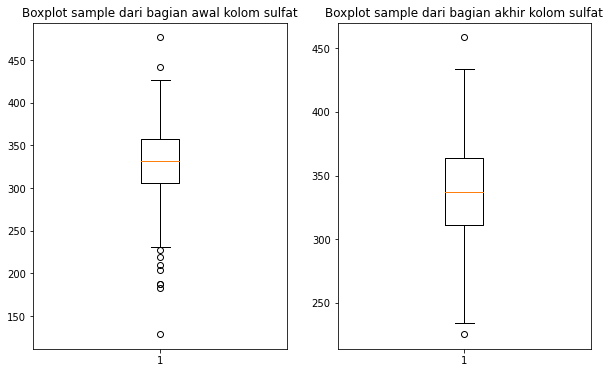

In [53]:
# 5e. Apakah bagian awal kolom Sulfate memiliki variansi yang sama dengan bagian akhirnya?
print("5e. Apakah bagian awal kolom Sulfate memiliki variansi yang sama dengan bagian akhirnya?")
sulfate1stHalf = data.head(len(data) // 2)['sulfate']
sulfate2ndHalf = data.tail(len(data) // 2)['sulfate']

# Langkah 1 : Tentukan Hipotesis nol H0
# Untuk kasus ini, kita menggunakan hipotesis nol H0 : (σ^2)_1 = (σ^2)_2
# sehingga dapat ditarik kesimpulan bahwa jika hipotesis nol diterima, variansi bagian awal Sulfate sama dengan variansi bagian akhir Sulfate

# Langkah 2 : Tentukan Hipotesis alternatif H1
# Untuk kasus ini, kita menggunakan hipotesis alternatif H1 : (σ^2)_1 ≠ (σ^2)_2
# Jika hipotesis alternatif ini yang diterima, maka variansi bagian awal Sulfate tidak sama dengan variansi bagian akhir Sulfate

# Langkah 3 : Tentukan tingkat signifikan α
# Untuk kasus ini, kita menggunakan tingkat signifikan α = 0.05
alpha = 0.05

# Langkah 4 : Tentukan uji statistik yang sesuai dan tentukan daerah kritis
# Tes statistik menggunakan 
# Bila ingin menolak H0 kasus ini, maka daerah kritis yang harus dipenuhi adalah f < f(1-alpha/2, v1, v2) atau f > f(alpha/2, v1, v2)
# Dengan v1 = n1 - 1 dan v2 = n2 - 1
# Nilai f-value dapat dicari menggunakan rumus berikut
# f = s1**2 / s2**2 dengan s adalah standar deviasi sampel
# Dengan menggunakan asumsi bahwa dataset yang diberikan adalah populasi dan penulis harus menentukan sampel sizenya sendiri

# Langkah 5a : Menentukan sample size
# Sample size ditentukan dengan menggunakan formula Yamane dan estimasi error rate 5%
# sampleSize = population_size / (1 + population_size * (error_rate ** 2))
sampleSizeSulfate1stHalf = math.ceil(len(sulfate1stHalf) / (1 + len(sulfate1stHalf) * (0.05 ** 2)))
sampleSizeSulfate2ndHalf = math.ceil(len(sulfate2ndHalf) / (1 + len(sulfate2ndHalf) * (0.05 ** 2)))
sulfate1stHalfSample = sulfate1stHalf.sample(n=sampleSizeSulfate1stHalf, replace=False, random_state=1)
sulfate2ndHalfSample = sulfate2ndHalf.sample(n=sampleSizeSulfate2ndHalf, replace=False, random_state=1)

# Langkah 5 : Hitung nilai uji statistik dari data sample (z-score) dan hitung p-value
f = (sulfate1stHalfSample.std() ** 2) / (sulfate2ndHalfSample.std() ** 2)
f_min = st.f.ppf(1-alpha/2, sampleSizeSulfate1stHalf - 1, sampleSizeSulfate2ndHalf - 1)
f_max = st.f.ppf(alpha/2, sampleSizeSulfate1stHalf - 1, sampleSizeSulfate2ndHalf - 1)
p_value = 1 - st.f.cdf(f, sampleSizeSulfate1stHalf - 1, sampleSizeSulfate2ndHalf - 1)

print("Nilai f: {f}".format(f=f))
print("Nilai z_alpha: {z_alpha}".format(z_alpha=z_alpha_score))
print("Nilai p-value: {p_value}".format(p_value=p_value))
print("Nilai f_min (batas bawah daerah kritis): {f_min}".format(f_min=f_min))
print("Nilai f_max (batas atas daerah kritis): {f_max}".format(f_max=f_max))

# Langkah 6 : Pengambilan keputusan
if f < f_min or f > f_max:
    if p_value > alpha:
        print("Hipotesis nol H0 gagal ditolak")
        print("Karena meskipun nilai f = {f} < f_min = {f_min} atau f = {f} > f_max = {f_max}, nilai p-value = {p_value} > alpha = {alpha}".format(f=f, f_min=f_min, f_max = f_max, p_value=p_value, alpha=alpha))
    else:
        print("Hipotesis nol H0 ditolak dan mengambil hipotesis alternatif H1")
        print("Karena nilai f = {f} < f_min = {f_min} atau f = {f} > f_max = {f_max} serta nilai p-value = {p_value} > alpha = {alpha}".format(f=f, f_min=f_min, f_max = f_max, p_value=p_value, alpha=alpha))
        print("Artinya, bagian awal kolom sulfate memiliki variansi yang tidak sama dengan bagian akhirnya")
else:
    print("Gagal menolak H0 karena nilai f = {f} >= f_min = {f_min} dan f = {f} <= f_max = {f_max}".format(f=f, f_min=f_min, f_max=f_max))
    print("Artinya, bagian awal kolom sulfate memiliki variansi yang sama dengan bagian akhirnya")

# Penampilan Boxplot
figure, axis = plt.subplots(1, 2, figsize=(10, 6), gridspec_kw={'width_ratios': [1, 1]})
axis[0].boxplot(sulfate1stHalfSample)
axis[1].boxplot(sulfate2ndHalfSample)
axis[0].set_title("Boxplot sample dari bagian awal kolom sulfat")
axis[1].set_title("Boxplot sample dari bagian akhir kolom sulfat")
plt.show()

Jawaban Nomor 6:
Untuk kolom non-target pH dengan kolom target


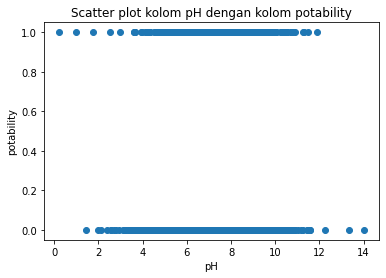

0.015475094408433471
Kolom non-target pH dengan kolom target potability tidak memiliki korelasi linear

Untuk kolom non-target hardness dengan kolom target


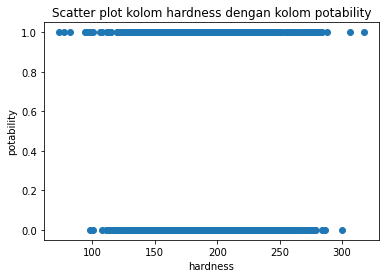

-0.0014631528959479587
Kolom non-target hardness dengan kolom target potability tidak memiliki korelasi linear

Untuk kolom non-target solids dengan kolom target


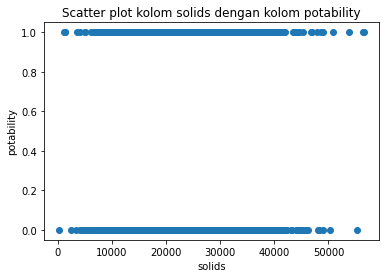

0.03897657818173474
Kolom non-target solids dengan kolom target potability tidak memiliki korelasi linear

Untuk kolom non-target chloramines dengan kolom target


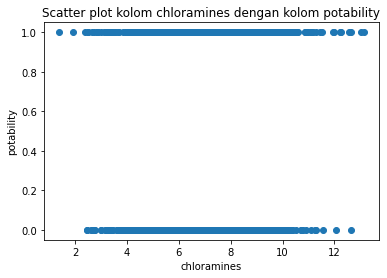

0.020778921840524107
Kolom non-target chloramines dengan kolom target potability tidak memiliki korelasi linear

Untuk kolom non-target sulfate dengan kolom target


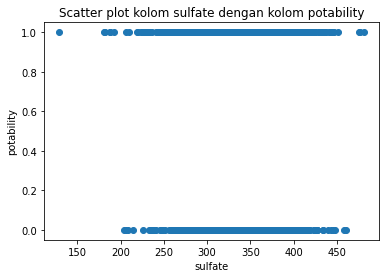

-0.01570316441927384
Kolom non-target sulfate dengan kolom target potability tidak memiliki korelasi linear

Untuk kolom non-target conductivity dengan kolom target


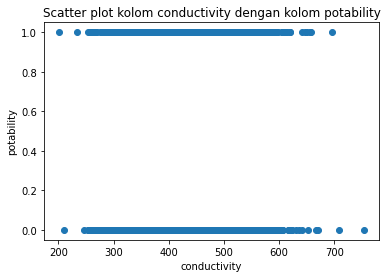

-0.016257120111377088
Kolom non-target conductivity dengan kolom target potability tidak memiliki korelasi linear

Untuk kolom non-target organicCarbon dengan kolom target


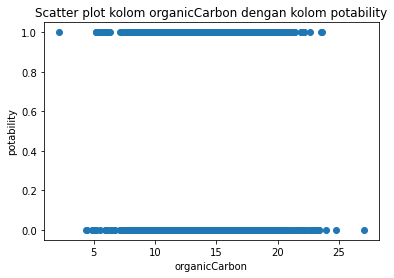

-0.015488461910747294
Kolom non-target organicCarbon dengan kolom target potability tidak memiliki korelasi linear

Untuk kolom non-target trihalomethanes dengan kolom target


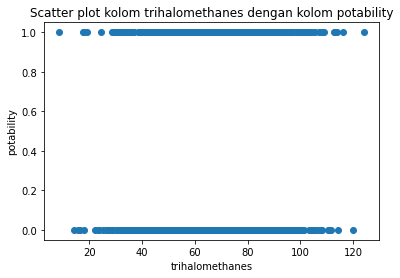

0.009236711064713049
Kolom non-target trihalomethanes dengan kolom target potability tidak memiliki korelasi linear

Untuk kolom non-target turbidity dengan kolom target


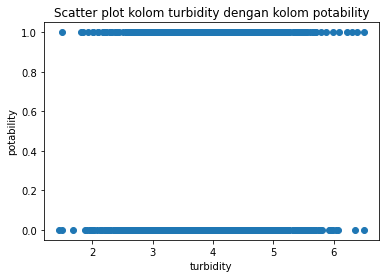

0.022331042640622696
Kolom non-target turbidity dengan kolom target potability tidak memiliki korelasi linear



In [3]:
# NOMOR 6
# Dicari koefisien korelasi antara masing masing kolom non-target dengan kolom target. Koefisien korelasi yang digunakan adalah Pearson's coefficient corelation untuk melihat seberapa kuat hubungan linear antara dua dataset. Pearson's coefficient corelation digunakan karena dataset yang ada memiliki distribusi Gaussian.
print("Jawaban Nomor 6:")
for columnName in data.columns[:-1]:
    print(f"Untuk kolom non-target {columnName} dengan kolom target potability")
    # Buat sebuah scatter plot dengan kolom non-target sebagai sumbu x dan kolom target sebagai sumbu y. Jika korelasi antara kolom non-target dengan kolom target positif, maka scatter plot akan cenderung berbentuk naik, jika korelasi antara kolom non-target dengan kolom target negatif, maka scatter plot akan cenderung turun, jika tidak ada korelasi antara kolom non-target dengan kolom target, maka scatter plot akan cenderung datar
    plt.scatter(data[columnName], data["potability"])
    plt.title(f"Scatter plot kolom {columnName} dengan kolom potability")
    plt.xlabel(columnName)
    plt.ylabel("potability")
    plt.show()
    # Cari koefisien korelasi menggunakan fungsi pearson. Fungsi ini akan mengembalikan dua nilai, koefisien korelasi dan p-value. Jika nilai koefisien korelasi mendekati -1, maka kedua data memiliki hubungan berbanding terbalik yang kuat. Jika nilai koefisien korelasi mendekati 0, maka kedua data tidak memiliki hubungan linear. Jika nilai koefisien korelasi mendekati 1, maka kedua data memiliki hubungan linear berbanding lurus yang kuat.
    corrCoef, _ = st.pearsonr(data[columnName], data["potability"])
    print(corrCoef)
    if (-1 <= corrCoef <= -0.5):
        print(f"Kolom non-target {columnName} dengan kolom target potability memiliki korelasi linear yang negatif")
    elif (-0.5 <= corrCoef <= 0.5):
        print(f"Kolom non-target {columnName} dengan kolom target potability tidak memiliki korelasi linear")
    else:
        print(f"Kolom non-target {columnName} dengan kolom target potability memiliki korelasi linear yang positif")
    print("")